In [594]:
import matplotlib.axis
import pandas as pd
import os

import pylab as p

In [595]:
# df = pd.read_csv("./Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")
# df.head()
# df.tail()

In [596]:
files = [file for file in os.listdir('./Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]

all_months_df = pd.DataFrame() #creating an empty dataframe to put in concat all the files

for file in files:
    df = pd.read_csv("./Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
    all_months_df = pd.concat([all_months_df,df])


In [597]:
all_months_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [598]:
all_months_df.to_csv("all_data.csv", index=False)

In [599]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [600]:
# Cleaning Data

In [601]:
all_data = all_data.dropna(how='all')

In [602]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [603]:
# augmented data
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

In [604]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [605]:
# in order to get sales and do the multiplication we first need to convert columns to int/float

In [606]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # OR all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # OR all_data['Price Each'] = all_data['Price Each'].astype('float')

In [607]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']

In [608]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [609]:
all_data = all_data.sort_values(by='Sales', ascending=False)

In [610]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
29834,181069,Macbook Pro Laptop,2,1700.00,04/27/19 21:01,"668 Park St, San Francisco, CA 94016",4,3400.00
173613,210292,Macbook Pro Laptop,2,1700.00,06/08/19 09:00,"953 Ridge St, San Francisco, CA 94016",6,3400.00
89549,200528,Macbook Pro Laptop,2,1700.00,05/13/19 13:40,"643 4th St, Boston, MA 02215",5,3400.00
30336,181544,Macbook Pro Laptop,2,1700.00,04/22/19 12:48,"731 11th St, New York City, NY 10001",4,3400.00
137282,278637,ThinkPad Laptop,2,999.99,10/02/19 16:06,"643 Cedar St, Boston, MA 02215",10,1999.98


In [611]:
results = all_data.groupby('Month').sum()

/var/folders/sd/vw2b2tf52yq_7zmqkl8llhp80000gp/T/ipykernel_53695/634113217.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


In [612]:
import matplotlib.pyplot as plt

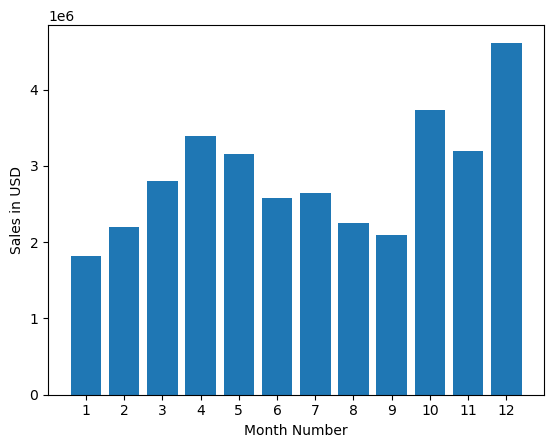

In [613]:
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month Number')
plt.show()

### What city has the highest number of sales

In [614]:
def get_city(address):
        return address.split(',')[1]


def get_state(address):
        return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

In [615]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
29834,181069,Macbook Pro Laptop,2,1700.00,04/27/19 21:01,"668 Park St, San Francisco, CA 94016",4,3400.00,San Francisco (CA)
173613,210292,Macbook Pro Laptop,2,1700.00,06/08/19 09:00,"953 Ridge St, San Francisco, CA 94016",6,3400.00,San Francisco (CA)
89549,200528,Macbook Pro Laptop,2,1700.00,05/13/19 13:40,"643 4th St, Boston, MA 02215",5,3400.00,Boston (MA)
30336,181544,Macbook Pro Laptop,2,1700.00,04/22/19 12:48,"731 11th St, New York City, NY 10001",4,3400.00,New York City (NY)
137282,278637,ThinkPad Laptop,2,999.99,10/02/19 16:06,"643 Cedar St, Boston, MA 02215",10,1999.98,Boston (MA)


In [616]:
cities_result = all_data.groupby('City').sum()
cities_result.head()

/var/folders/sd/vw2b2tf52yq_7zmqkl8llhp80000gp/T/ipykernel_53695/1953017743.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cities_result = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80


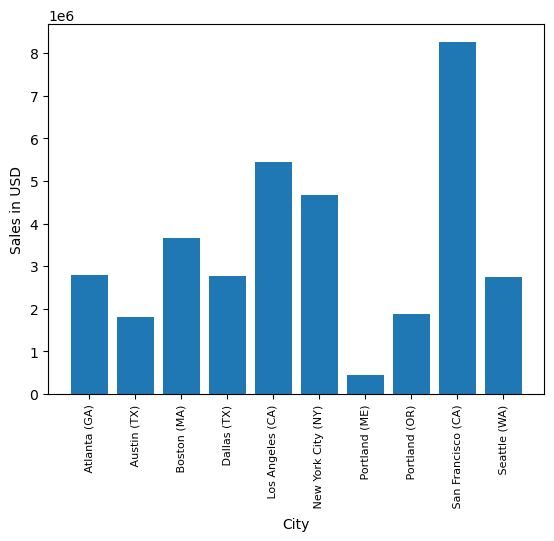

In [617]:
cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities,cities_result['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.show()

# Most popular order time

In [618]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [619]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [620]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
29834,181069,Macbook Pro Laptop,2,1700.00,2019-04-27 21:01:00,"668 Park St, San Francisco, CA 94016",4,3400.00,San Francisco (CA),21,1
173613,210292,Macbook Pro Laptop,2,1700.00,2019-06-08 09:00:00,"953 Ridge St, San Francisco, CA 94016",6,3400.00,San Francisco (CA),9,0
89549,200528,Macbook Pro Laptop,2,1700.00,2019-05-13 13:40:00,"643 4th St, Boston, MA 02215",5,3400.00,Boston (MA),13,40
30336,181544,Macbook Pro Laptop,2,1700.00,2019-04-22 12:48:00,"731 11th St, New York City, NY 10001",4,3400.00,New York City (NY),12,48
137282,278637,ThinkPad Laptop,2,999.99,2019-10-02 16:06:00,"643 Cedar St, Boston, MA 02215",10,1999.98,Boston (MA),16,6


In [621]:
hours = [hour for hour , df in all_data.groupby('Hour')]

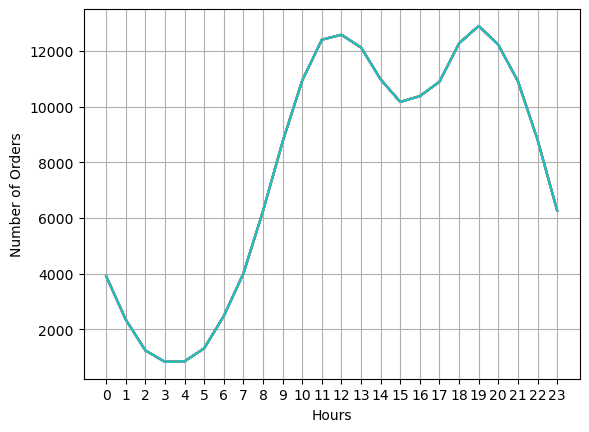

In [622]:
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

###  The most common group of products sold together


In [623]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [624]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','. join(x))

/var/folders/sd/vw2b2tf52yq_7zmqkl8llhp80000gp/T/ipykernel_53695/1154884736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','. join(x))


In [625]:
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
29834,181069,"Macbook Pro Laptop,34in Ultrawide Monitor"
64927,170979,"Macbook Pro Laptop,AA Batteries (4-pack)"
65933,171945,"Macbook Pro Laptop,Lightning Charging Cable"
66273,172267,"Macbook Pro Laptop,Wired Headphones"
72366,238213,"Macbook Pro Laptop,Apple Airpods Headphones"


In [626]:
from itertools import combinations
from collections import Counter


In [627]:
count = Counter()

In [628]:
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2))) # if you want to change the grouping, instead of 2 use 3 or 4 in order to see more combinations


In [629]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1015),
 (('Google Phone', 'USB-C Charging Cable'), 999),
 (('iPhone', 'Wired Headphones'), 462),
 (('Google Phone', 'Wired Headphones'), 423),
 (('iPhone', 'Apple Airpods Headphones'), 373),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 368),
 (('Google Phone', 'Bose SoundSport Headphones'), 228),
 (('Wired Headphones', 'USB-C Charging Cable'), 189),
 (('Vareebadd Phone', 'Wired Headphones'), 149),
 (('Apple Airpods Headphones', 'Lightning Charging Cable'), 116)]

In [630]:
for key,value in count.most_common(20):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1015
('Google Phone', 'USB-C Charging Cable') 999
('iPhone', 'Wired Headphones') 462
('Google Phone', 'Wired Headphones') 423
('iPhone', 'Apple Airpods Headphones') 373
('Vareebadd Phone', 'USB-C Charging Cable') 368
('Google Phone', 'Bose SoundSport Headphones') 228
('Wired Headphones', 'USB-C Charging Cable') 189
('Vareebadd Phone', 'Wired Headphones') 149
('Apple Airpods Headphones', 'Lightning Charging Cable') 116
('Lightning Charging Cable', 'Wired Headphones') 112
('Lightning Charging Cable', 'AA Batteries (4-pack)') 105
('Bose SoundSport Headphones', 'USB-C Charging Cable') 102
('Apple Airpods Headphones', 'Wired Headphones') 100
('Lightning Charging Cable', 'USB-C Charging Cable') 94
('USB-C Charging Cable', 'AAA Batteries (4-pack)') 90
('Wired Headphones', 'AAA Batteries (4-pack)') 86
('Wired Headphones', 'AA Batteries (4-pack)') 82
('Vareebadd Phone', 'Bose SoundSport Headphones') 82
('Apple Airpods Headphones', 'AAA Batteries (4-pack)')

In [631]:
popular_pr = all_data.groupby('Product')

In [640]:
#popular_pr.sum(['Product']).sort_values(by='Quantity Ordered', ascending = False)
popular = popular_pr.sum()
popular_pr.head()

/var/folders/sd/vw2b2tf52yq_7zmqkl8llhp80000gp/T/ipykernel_53695/644681671.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  popular = popular_pr.sum()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
29834,181069,Macbook Pro Laptop,2,1700.00,2019-04-27 21:01:00,"668 Park St, San Francisco, CA 94016",4,3400.00,San Francisco (CA),21,1
173613,210292,Macbook Pro Laptop,2,1700.00,2019-06-08 09:00:00,"953 Ridge St, San Francisco, CA 94016",6,3400.00,San Francisco (CA),9,0
89549,200528,Macbook Pro Laptop,2,1700.00,2019-05-13 13:40:00,"643 4th St, Boston, MA 02215",5,3400.00,Boston (MA),13,40
30336,181544,Macbook Pro Laptop,2,1700.00,2019-04-22 12:48:00,"731 11th St, New York City, NY 10001",4,3400.00,New York City (NY),12,48
137282,278637,ThinkPad Laptop,2,999.99,2019-10-02 16:06:00,"643 Cedar St, Boston, MA 02215",10,1999.98,Boston (MA),16,6
...,...,...,...,...,...,...,...,...,...,...,...
160735,224719,AAA Batteries (4-pack),8,2.99,2019-07-26 23:59:00,"876 Adams St, San Francisco, CA 94016",7,23.92,San Francisco (CA),23,59
137210,278566,AAA Batteries (4-pack),8,2.99,2019-10-13 19:07:00,"992 Park St, Los Angeles, CA 90001",10,23.92,Los Angeles (CA),19,7
16115,311064,AA Batteries (4-pack),6,3.84,2019-12-30 12:13:00,"582 River St, San Francisco, CA 94016",12,23.04,San Francisco (CA),12,13
18115,312970,AA Batteries (4-pack),6,3.84,2019-12-12 10:59:00,"879 West St, New York City, NY 10001",12,23.04,New York City (NY),10,59


In [641]:
products = [product for product, df in popular_pr]

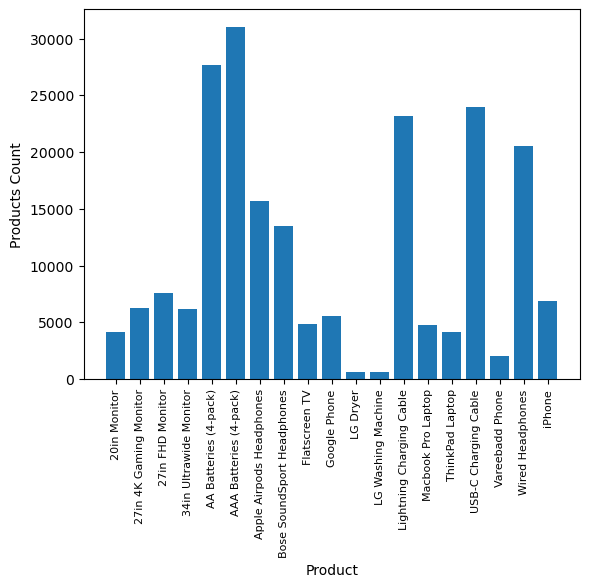

In [642]:
plt.bar(products, popular['Quantity Ordered'])
plt.xticks(products, rotation = 'vertical', size = 8)
plt.ylabel('Products Count')
plt.xlabel('Product')
plt.show()

### To overlay the below price data on the above chart in order to verify the correlation



/var/folders/sd/vw2b2tf52yq_7zmqkl8llhp80000gp/T/ipykernel_53695/3884317374.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
/var/folders/sd/vw2b2tf52yq_7zmqkl8llhp80000gp/T/ipykernel_53695/3884317374.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels (products, rotation='vertical', size = 8)


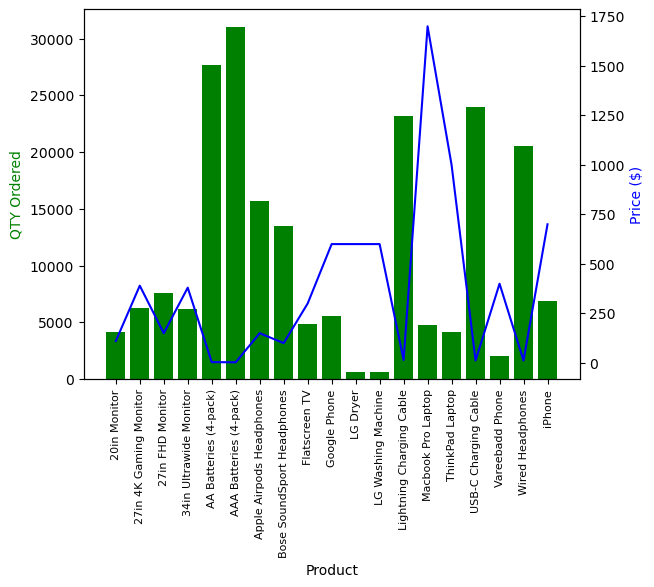

In [649]:
prices = all_data.groupby('Product').mean()['Price Each']
# print(prices)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, popular['Quantity Ordered'], color = 'g')
ax2.plot(products, prices, color = 'b')

ax1.set_xlabel('Product')
ax1.set_ylabel('QTY Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')

ax1.set_xticklabels (products, rotation='vertical', size = 8)
plt.show()